In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
from sklearn.feature_extraction.text import CountVectorizer
import json
import marimo as mo

In [ ]:
def load_json(file):
    with open(file) as f:
        data = json.load(f)
        return data

speeches = pd.DataFrame(load_json("speeches.json"))
speeches.head()

<marimo-table data-initial-value='[]' data-label='null' data-data='"[{\"doc_name\":\"january-22-1807-special-message-congress-burr-conspiracy\",\"date\":\"1807-01-22\",\"transcript\":\"TO THE SENATE AND HOUSE OF REPRESENTATIVES OF THE UNITED STATES:Agreeably to the request of the House of Representatives, communicated in their resolution of the 16th instant, I proceed to state under the reserve therein expressed, information received touching an illegal combination of private individuals against the peace and safety of the Union, and a military expedition planned by them against the territories of a power in amity with the United States, with the measures I have pursued for suppressing the same.I had for some time been in the constant expectation of receiving such further information as would have enabled me to lay before the legislature the termination as well as the beginning and progress of this scene of depravity, so far it has been acted on the Ohio and its waters. From this the state and safety of the lower country might have been estimated on probable grounds, and the delay was indulged the rather, because no circumstance had yet made it necessary to call in the aid of the legislative functions. Information now recently communicated has brought us nearly to the period contemplated. The mass of what I have received, in the course of these transactions, is voluminous, but little has been given under the sanction of an oath, so as to constitute formal and legal evidence. It is chiefly in the form of letters, often containing such a mixture of rumors, conjectures, and suspicions, as render it difficult to sift out the real facts, and unadvisable to hazard more than general outlines, strengthened by concurrent information, or the particular credibility of the relater. In this state of the evidence, delivered sometimes too under the restriction of private confidence, neither safety nor justice will permit the exposing names, except that of the principal actor, whose guilt is placed beyond question.Some time in the latter part of September, I received intimations that designs were in agitation in the western country, unlawful and unfriendly to the peace of the Union; and that the prime mover in these was Aaron Burr, heretofore distinguished by the favor of his country. The grounds of these intimations being inconclusive, the objects uncertain, and the fidelity of that country known to be firm, the only measure taken was to urge the informants to use their best endeavors to get further insight into the designs and proceedings of the suspected persons, and to communicate them to me.It was not until the latter part of October, that the objects of the conspiracy began to be perceived, but still so blended and involved in mystery that nothing distinct could be singled out for pursuit. In this state of uncertainty as to the crime contemplated, the acts done, and the legal course to be pursued, I thought it best to send to the scene where these things were principally in transaction, a person, in whose integrity, understanding, and discretion, entire confidence could be reposed, with instructions to investigate the plots going on, to enter into conference (for which he had sufficient credentials) with the governors and all other officers, civil and military, and with their aid to do on the spot whatever should be necessary to discover the designs of the conspirators, arrest their means, bring their persons to punishment, and to call out the force of the country to suppress any unlawful enterprise in which it should be found they were engaged. By this time it was known that many boats were under preparation, stores of provisions collecting, and an unusual number of suspicious characters in motion on the Ohio and its waters. Besides despatching the confidential agent to that quarter, orders were at the same time sent to the governors of the Orleans and Mississippi territories, and to the commanders of the land and naval forces there, t

In [ ]:
speeches.drop(columns=['doc_name'], inplace=True)
speeches

<marimo-table data-initial-value='[]' data-label='null' data-data='"[{\"date\":\"1807-01-22\",\"transcript\":\"TO THE SENATE AND HOUSE OF REPRESENTATIVES OF THE UNITED STATES:Agreeably to the request of the House of Representatives, communicated in their resolution of the 16th instant, I proceed to state under the reserve therein expressed, information received touching an illegal combination of private individuals against the peace and safety of the Union, and a military expedition planned by them against the territories of a power in amity with the United States, with the measures I have pursued for suppressing the same.I had for some time been in the constant expectation of receiving such further information as would have enabled me to lay before the legislature the termination as well as the beginning and progress of this scene of depravity, so far it has been acted on the Ohio and its waters. From this the state and safety of the lower country might have been estimated on probable grounds, and the delay was indulged the rather, because no circumstance had yet made it necessary to call in the aid of the legislative functions. Information now recently communicated has brought us nearly to the period contemplated. The mass of what I have received, in the course of these transactions, is voluminous, but little has been given under the sanction of an oath, so as to constitute formal and legal evidence. It is chiefly in the form of letters, often containing such a mixture of rumors, conjectures, and suspicions, as render it difficult to sift out the real facts, and unadvisable to hazard more than general outlines, strengthened by concurrent information, or the particular credibility of the relater. In this state of the evidence, delivered sometimes too under the restriction of private confidence, neither safety nor justice will permit the exposing names, except that of the principal actor, whose guilt is placed beyond question.Some time in the latter part of September, I received intimations that designs were in agitation in the western country, unlawful and unfriendly to the peace of the Union; and that the prime mover in these was Aaron Burr, heretofore distinguished by the favor of his country. The grounds of these intimations being inconclusive, the objects uncertain, and the fidelity of that country known to be firm, the only measure taken was to urge the informants to use their best endeavors to get further insight into the designs and proceedings of the suspected persons, and to communicate them to me.It was not until the latter part of October, that the objects of the conspiracy began to be perceived, but still so blended and involved in mystery that nothing distinct could be singled out for pursuit. In this state of uncertainty as to the crime contemplated, the acts done, and the legal course to be pursued, I thought it best to send to the scene where these things were principally in transaction, a person, in whose integrity, understanding, and discretion, entire confidence could be reposed, with instructions to investigate the plots going on, to enter into conference (for which he had sufficient credentials) with the governors and all other officers, civil and military, and with their aid to do on the spot whatever should be necessary to discover the designs of the conspirators, arrest their means, bring their persons to punishment, and to call out the force of the country to suppress any unlawful enterprise in which it should be found they were engaged. By this time it was known that many boats were under preparation, stores of provisions collecting, and an unusual number of suspicious characters in motion on the Ohio and its waters. Besides despatching the confidential agent to that quarter, orders were at the same time sent to the governors of the Orleans and Mississippi territories, and to the commanders of the land and naval forces there, to be on their guard against surprise, and in constant readiness to resist 

In [ ]:
print(speeches['president'].unique())

['Thomas Jefferson' 'James Madison' 'Woodrow Wilson' 'Gerald Ford'
 'James K. Polk' 'George W. Bush' 'Lyndon B. Johnson'
 'Franklin D. Roosevelt' 'James Monroe' 'John F. Kennedy'
 'Chester A. Arthur' 'Donald Trump' 'Harry S. Truman' 'George Washington'
 'Ronald Reagan' 'John Tyler' 'Bill Clinton' 'Grover Cleveland'
 'Richard M. Nixon' 'Calvin Coolidge' 'Andrew Jackson' 'Jimmy Carter'
 'Abraham Lincoln' 'Franklin Pierce' 'Joe Biden' 'Barack Obama'
 'Rutherford B. Hayes' 'Benjamin Harrison' 'Herbert Hoover'
 'George H. W. Bush' 'Theodore Roosevelt' 'Ulysses S. Grant'
 'Warren G. Harding' 'Andrew Johnson' 'Martin Van Buren'
 'James A. Garfield' 'James Buchanan' 'William McKinley' 'William Taft'
 'Dwight D. Eisenhower' 'John Quincy Adams' 'John Adams' 'Zachary Taylor'
 'William Harrison' 'Millard Fillmore']


In [ ]:
presidents = pd.read_csv("presidents.csv")
presidents

[E 250508 17:31:06 functions:66](B Error calling function get_column_summaries: Missing optional dependency 'pyarrow'.  Use pip or conda to install pyarrow.


In [ ]:
pres_names = presidents['President Name'].str.replace(' ', '', regex=True)
speeches_clean = speeches[speeches['president'].str.replace(' ', '', regex=True).isin(pres_names)]
speeches_clean = speeches_clean.sort_values('date').reset_index(drop=True)
speeches_clean = speeches_clean[['date', 'president','title','transcript']]
speeches_clean['doc_id'] = speeches_clean.index
cols = ['doc_id'] + [col for col in speeches_clean.columns if col != 'doc_id']
speeches_clean = speeches_clean[cols]
speeches_clean.set_index('doc_id', inplace=True)
speeches_clean

[E 250508 17:31:06 functions:66](B Error calling function get_column_summaries: Missing optional dependency 'pyarrow'.  Use pip or conda to install pyarrow.


In [ ]:
print(speeches_clean['president'].unique())

['Harry S. Truman' 'Richard M. Nixon' 'Dwight D. Eisenhower'
 'John F. Kennedy' 'Lyndon B. Johnson' 'Ronald Reagan' 'Gerald Ford'
 'Jimmy Carter' 'George H. W. Bush' 'Bill Clinton' 'George W. Bush'
 'Barack Obama' 'Donald Trump' 'Joe Biden']


In [ ]:
speeches_clean['tokenized_text'] = speeches_clean['transcript'].apply(word_tokenize)

In [ ]:
import re
def clean_text(text):
    # Remove special characters and numbers, but keep sentence-ending punctuation and apostrophes
    text = re.sub(r'[^A-Za-z\s.?!,:\']', '', text) 
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Normalize whitespace (remove leading/trailing and extra spaces within)
    text = ' '.join(text.split())

    return text

def preprocess_text(text):
    text = clean_text(text)
    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    return lemmatized_tokens

def token_to_text(tokens):
    preprocessed_text = " ".join(tokens)

    return preprocessed_text

speeches_clean['lem_tokenized_text'] = speeches_clean['transcript'].apply(preprocess_text)
speeches['transcript_clean'] = speeches['transcript'].apply(clean_text)
speeches_clean['transcript_clean'] = speeches_clean['transcript'].apply(clean_text)

In [ ]:
vectorizer_model = CountVectorizer(stop_words="english")
representation_model = KeyBERTInspired(random_state=66)
topic_model = BERTopic(vectorizer_model=vectorizer_model, representation_model=representation_model, min_topic_size=5)
topics, probs = topic_model.fit_transform(speeches['transcript_clean'].to_list())
topic_model.get_topic_info()

<marimo-table data-initial-value='[]' data-label='null' data-data='"[{\"Topic\":-1,\"Count\":309,\"Name\":\"-1_congress_constitution_federal_president\",\"Representation\":[\"congress\",\"constitution\",\"federal\",\"president\",\"government\",\"legislation\",\"states\",\"citizens\",\"political\",\"union\"],\"Representative_Docs\":[\"To the Senate and House of Representatives: The reports of the heads of the several Executive Departments required by law to be submitted to me, which are herewith transmitted, and the reports of the Secretary of the Treasury and the AttorneyGeneral, made directly to Congress, furnish a comprehensive view of the administrative work of the last fiscal year relating to internal affair. It would be of great advantage if these reports could have an alternative perusal by every member of Congress and by all who take an interest in public affairs. Such a perusal could not fail to excite a higher appreciation of the vast labor and conscientious effort which are given to the conduct of our civil administration. The reports will, I believe, show that every question has been approached, considered, and decided from the standpoint of public duty upon considerations affecting the public interests alone. Again I invite to every branch of the service the attention and scrutiny of Congress. The work of the State Department during the last year has been characterized by an unusual number of important negotiations and by diplomatic results of a notable and highly beneficial character. Among these are the reciprocal trade arrangements which have been concluded, in the exercise of the powers conferred by section of the tariff law, with the Republic of Brazil, with Spain for its West India possessions, and with Santo Domingo. Like negotiations with other countries have been much advanced, and it is hoped that before the close of the year further definitive trade arrangements of great value will be concluded. In view of the reports which had been received as to the diminution of the seal herds in the Bering Sea, I deemed it wise to propose to Her Majestys Government in February last that an agreement for a closed season should be made pending the negotiations for arbitration, which then seemed to be approaching a favorable conclusion. After much correspondence and delays, for which this Government was not responsible, an agreement was reached and signed on the th of June, by which Great Britain undertook from that date and until May , , to prohibit the killing by her subjects of seals in the Bering Sea, and the Government of the United States during the same period to enforce its existing prohibition against pelagic sealing and to limit the catch by the furseal company upon the islands to , skins. If this agreement could have been reached earlier in response to the strenuous endeavors of this Government, it would have been more effective but coming even as late as it did it unquestionably resulted in greatly diminishing the destruction of the seals by the Canadian sealers. In my last annual message I stated that the basis of arbitration proposed by Her Majestys Government for the adjustment of the longpending controversy as to the seal fisheries was not acceptable. I am glad now to be able to announce that terms satisfactory to this Government have been agreed upon and that an agreement as to the arbitrators is all that is necessary to the completion of the convention. In view of the advanced position which this Government has taken upon the subject of international arbitration, this renewed expression of our adherence to this method for the settlement of disputes such as have arisen in the Bering Sea will, I doubt not, meet with the concurrence of Congress. Provision should be made for a joint demarcation of the frontier line between Canada and the United States wherever required by the increasing border settlements, and especially for the exact location of the water boundary in the straits and rivers. I should have 

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
all_sentences = []

for doc_id, row in speeches_clean.iterrows():
    sentences = sent_tokenize(row['transcript_clean'])
    for idx, sentence in enumerate(sentences):
        score = sia.polarity_scores(sentence)['compound']
        all_sentences.append({
            'doc_id': doc_id,
            'sentence_index': idx,
            'sentence_text': sentence,
            'sentiment_score': score
        })


sentence_sentiment = pd.DataFrame(all_sentences)
sentence_sentiment.head()

<marimo-table data-initial-value='[]' data-label='null' data-data='"[{\"doc_id\":0,\"sentence_index\":0,\"sentence_text\":\"Mr. Speaker, Mr. President, Members of the Congress: It is with a heavy heart that I stand before you, my friends and colleagues, in the Congress of the United States.\",\"sentiment_score\":0.7096},{\"doc_id\":0,\"sentence_index\":1,\"sentence_text\":\"Only yesterday, we laid to rest the mortal remains of our beloved President, Franklin Delano Roosevelt.\",\"sentiment_score\":0.5106},{\"doc_id\":0,\"sentence_index\":2,\"sentence_text\":\"At a time like this, words are inadequate.\",\"sentiment_score\":-0.0516},{\"doc_id\":0,\"sentence_index\":3,\"sentence_text\":\"The most eloquent tribute would be a reverent silence.\",\"sentiment_score\":0.0},{\"doc_id\":0,\"sentence_index\":4,\"sentence_text\":\"Yet, in this decisive hour, when world events are moving so rapidly, our silence might be misunderstood and might give comfort to our enemies.\",\"sentiment_score\":-0.2441}]"' data-total-rows='5' data-total-columns='4' data-banner-text='""' data-pagination='true' data-page-size='10' data-field-types='[["doc_id", ["integer", "int64"]], ["sentence_index", ["integer", "int64"]], ["sentence_text", ["string", "object"]], ["sentiment_score", ["number", "float64"]]]' data-show-filters='true' data-show-download='true' data-show-column-summaries='false' data-row-headers='[]' data-has-stable-row-id='false' data-lazy='false' data-preload='false'>

In [ ]:
import textstat

def lexical_diversity(text):
    tokens = word_tokenize(text.lower())
    unique_tokens = set(tokens)
    return len(unique_tokens) / len(tokens) if len(tokens) > 0 else 0


def get_readability_metrics(text):
    return {
        'flesch_reading_ease': textstat.flesch_reading_ease(text),
        'flesch_kincaid_grade': textstat.flesch_kincaid_grade(text),
        'smog_index': textstat.smog_index(text),
        'coleman_liau_index': textstat.coleman_liau_index(text),
        'automated_readability_index': textstat.automated_readability_index(text),
        'dale_chall_score': textstat.dale_chall_readability_score(text),
        'difficult_words': textstat.difficult_words(text),
        'readability_consensus': textstat.text_standard(text, float_output = True)
    }

def add_speech_metrics(row):
    text = row['transcript_clean']
    metrics = get_readability_metrics(text)
    metrics['lexical_diversity'] = lexical_diversity(text)
    return pd.Series(metrics)

df_metrics = speeches_clean.apply(add_speech_metrics, axis=1)
df_overall = pd.concat([speeches_clean, df_metrics], axis=1)

df_overall

<marimo-table data-initial-value='[]' data-label='null' data-data='"[{\"doc_id\":0,\"date\":\"1945-04-16\",\"president\":\"Harry S. Truman\",\"title\":\"April 16, 1945: First Speech to Congress\",\"transcript\":\"Mr. Speaker, Mr. President, Members of the Congress:\\r\\nIt is with a heavy heart that I stand before you, my friends and colleagues, in the Congress of the United States.\\r\\nOnly yesterday, we laid to rest the mortal remains of our beloved President, Franklin Delano Roosevelt. At a time like this, words are inadequate. The most eloquent tribute would be a reverent silence.\\r\\nYet, in this decisive hour, when world events are moving so rapidly, our silence might be misunderstood and might give comfort to our enemies.\\r\\nIn His infinite wisdom, Almighty God has seen fit to take from us a great man who loved, and was beloved by, all humanity.\\r\\nNo man could possibly fill the tremendous void left by the passing of that noble soul. No words can ease the aching hearts of untold millions of every race, creed and color. The world knows it has lost a heroic champion of justice and freedom.\\r\\nTragic fate has thrust upon us grave responsibilities. We must carry on. Our departed leader never looked backward. He looked forward and moved forward. That is what he would want us to do. That is what America will do.\\r\\nSo much blood has already been shed for the ideals which we cherish, and for which Franklin Delano Roosevelt lived and died, that we dare not permit even a momentary pause in the hard fight for victory.\\r\\nToday, the entire world is looking to America for enlightened leadership to peace and progress. Such a leadership requires vision, courage and tolerance. It can be provided only by a united nation deeply devoted to the highest ideals.\\r\\nWith great humility I call upon all Americans to help me keep our nation united in defense of those ideals which have been so eloquently proclaimed by Franklin Roosevelt.\\r\\nI want in turn to assure my fellow Americans and all of those who love peace and liberty throughout the world that I will support and defend those ideals with all my strength and all my heart. That is my duty and I shall not shirk it.\\r\\nSo that there can be no possible misunderstanding, both Germany and Japan can be certain, beyond any shadow of a doubt, that America will continue the fight for freedom until no vestige of resistance remains!\\r\\nWe are deeply conscious of the fact that much hard fighting is still ahead of us.\\r\\nHaving to pay such a heavy price to make complete victory certain, America will never become a party to any plan for partial victory!\\r\\nTo settle for merely another temporary respite would surely jeopardize the future security of all the world.\\r\\nOur demand has been, and it remains\\u2014Unconditional Surrender!\\r\\nWe will not traffic with the breakers of the peace on the terms of the peace.\\r\\nThe responsibility for making of the peace--and it is a very grave responsibility\\u2014must rest with the defenders of the peace. We are not unconscious of the dictates of humanity. We do not wish to see unnecessary or unjustified suffering. But the laws of God and of man have been violated and the guilty must not go unpunished. Nothing shall shake our determination to punish the war criminals even though we must pursue them to the ends of the earth.\\r\\nLasting peace can never be secured if we permit our dangerous opponents to plot future wars with impunity at any mountain retreat\\u2014however distant.\\r\\nIn this shrinking world, it is futile to seek safety behind geographical barriers. Real security will be found only in law and in justice.\\r\\nHere in America, we have labored long and hard to achieve a social order worthy of our great heritage. In our time, tremendous progress has been made toward a really democratic way of life. Let me assure the forward-looking people of America that there will be no relaxation in our efforts to improve the lot of the 

In [ ]:
df_polarity = sentence_sentiment[['doc_id','sentiment_score']]
df_polarity_avg = df_polarity.groupby('doc_id')['sentiment_score'].mean().reset_index()

In [ ]:
df_polarity_avg

<marimo-table data-initial-value='[]' data-label='null' data-data='"[{\"doc_id\":0,\"sentiment_score\":0.21368},{\"doc_id\":1,\"sentiment_score\":0.163096875},{\"doc_id\":2,\"sentiment_score\":-0.0289555556},{\"doc_id\":3,\"sentiment_score\":0.1134267281},{\"doc_id\":4,\"sentiment_score\":0.1526236364},{\"doc_id\":5,\"sentiment_score\":0.2129708955},{\"doc_id\":6,\"sentiment_score\":0.1063781818},{\"doc_id\":7,\"sentiment_score\":0.0453293478},{\"doc_id\":8,\"sentiment_score\":0.3051596774},{\"doc_id\":9,\"sentiment_score\":0.1381891156}]"' data-total-rows='497' data-total-columns='2' data-banner-text='""' data-pagination='true' data-page-size='10' data-field-types='[["doc_id", ["integer", "int64"]], ["sentiment_score", ["number", "float64"]]]' data-show-filters='true' data-show-download='true' data-show-column-summaries='true' data-row-headers='[]' data-has-stable-row-id='false' data-lazy='false' data-preload='false'>

In [ ]:
pres_info = presidents
pres_info.rename(columns={'President Name': 'president'}, inplace=True)
#pres_info['President Name'].str.replace(' ', '', regex=True)

In [ ]:
metrics = [
    'president',
    'flesch_reading_ease',
    'flesch_kincaid_grade', 
    'smog_index', 
    'coleman_liau_index',
    'automated_readability_index', 
    'dale_chall_score', 
    'difficult_words',
    'readability_consensus', 
    'lexical_diversity'   
]
df_subset = df_overall[metrics]
df_subset = df_subset.merge(df_polarity_avg, on='doc_id', how='left')
pres_speech_means = df_subset.groupby('president').mean().reset_index()
pres_speech_means = pres_speech_means.merge(pres_info, on='president', how='left')
pres_speech_means = pres_speech_means.drop(columns=['Number','Years In Office'])

In [ ]:
pres_speech_means.columns

Index(['president', 'doc_id', 'flesch_reading_ease', 'flesch_kincaid_grade',
 'smog_index', 'coleman_liau_index', 'automated_readability_index',
 'dale_chall_score', 'difficult_words', 'readability_consensus',
 'lexical_diversity', 'sentiment_score', 'Party',
 'Average Approval Rating Percentage'],
 dtype='object')

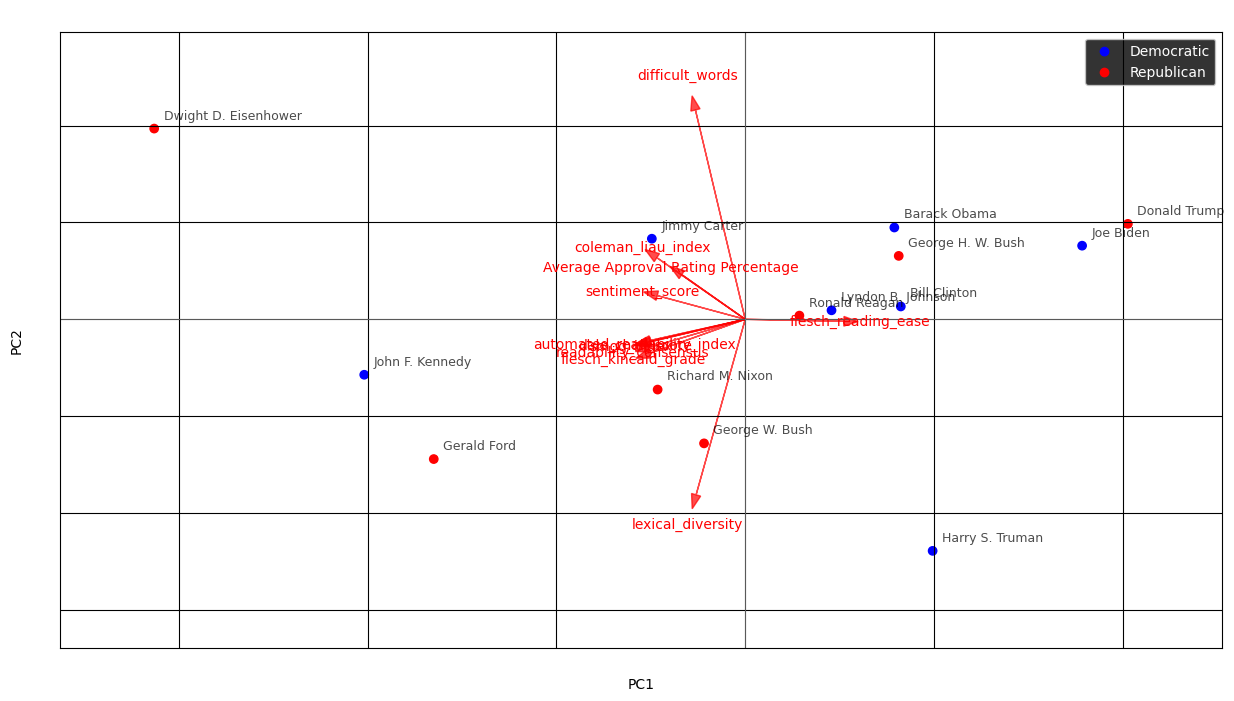

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

labels = ['president','Party']
drops = labels + ['doc_id']
identifiers = pres_speech_means[labels].copy()
X = pres_speech_means.drop(drops, axis=1)
reduced_data = X.copy()
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2, random_state=66)
principalComponents = pca.fit_transform(X_scaled)
loadings = pca.components_.T  # Each row corresponds to a feature

# Build PCA scores DataFrame
df_pca = pd.DataFrame(principalComponents, columns=['PC1', 'PC2'])
df_pca = pd.concat([identifiers.reset_index(drop=True), df_pca], axis=1)

# Plot
fig, ax = plt.subplots(figsize=(15, 8))
fig.patch.set_facecolor('white')

# Scatter points (presidents)
for party in df_pca['Party'].unique():
    if party == "Republican":
        color = ['red']
    else:
        color = ['blue']
    subset = df_pca[df_pca['Party'] == party]
    color = color * len(subset)
    ax.scatter(subset['PC1'], subset['PC2'], label=party, c=color)

# Draw variable loadings as arrows
for i, feature in enumerate(reduced_data):
    ax.arrow(0, 0, loadings[i, 0]*3, loadings[i, 1]*3,
             color='red', alpha=0.7, head_width=0.1)
    ax.text(loadings[i, 0]*3.5, loadings[i, 1]*3.5, feature, color='red', ha='center', va='center')

# Add text labels to each point (president)
for _, row_num in df_pca.iterrows():
    ax.text(row_num['PC1'] + 0.1, row_num['PC2'] + 0.1, row_num['president'],
            fontsize=9, alpha=0.7, color='black')

ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

ax.set_xlabel('PC1', color='black')
ax.set_ylabel('PC2', color='black')
ax.set_xlim(df_pca['PC1'].min() - 1, df_pca['PC1'].max() + 1)
ax.set_ylim(df_pca['PC2'].min() - 1, df_pca['PC2'].max() + 1)
ax.axhline(0, color='gray', linewidth=0.5)
ax.axvline(0, color='gray', linewidth=0.5)
ax.set_title('PCA Biplot of Presidential Speech Features')
ax.legend()
ax.set_facecolor('white')
plt.grid(True, color='black')
plt.show()

# Plot Ideas
- Topics changes over time (lines)
- Sentiment by President
- Topic by president
- Speech Complexity, readability, lexicon, etc. by President / Time